# Weatherpy


-  Observation 1 - Temperatures appear to be highest between 20 and 50 degrees latitude.
-  Observation 2 - Cloudiness appears to be pretty random, perhaps no correlation.
-  Observation 3 - For most part, wind speed is less than 20 miles per hour in all latitudes.
-  Observation 4 - This homework assignment sucked up way too much of my time.  It began with a lot of frustration due to citipy install taking a ton of research to find that I had to install pip even though everything I read said it was included with Python 3.  I likely consumed 3 bottles of wine working this less than fun assignment.  Cheers!
-  Observation 5 - I was 99% done and ran the code again and it came back with less than 400 cities.  Cuss  Ran again later and pulled in 505.  I deserve a beer or 5.
-  Obseration 6 - My hard drive died at work on Monday so be nice to me!

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1350)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1350)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

563

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

In [4]:
# List of the data I need from json file
name = []
cloudiness = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind = []

count = 1
_set = 1


# Loop through the cities pulled from citipy retrieve requested data
for city in cities:
    try:
        response = requests.get(url + city).json()
        cloudiness.append(response['clouds']['all'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        name.append(response['name'])
        
        print(f"{count}. {city}")
                
        count += 1

    except KeyError:
        print("City not found...skipping")
        
        _set += 1

1. vaini
2. longyearbyen
3. culebra
4. busselton
5. puerto ayora
6. faya
7. rikitea
8. kodiak
9. qaanaaq
10. clyde river
11. albany
12. lakes entrance
13. colon
14. katsuura
15. constitucion
16. hermanus
17. taoudenni
18. hambantota
19. atuona
20. kiama
21. bathsheba
22. bluff
23. hami
24. kulhudhuffushi
25. bethel
26. riviere-au-renard
27. zhigansk
28. lichinga
29. punta arenas
30. seoul
31. faanui
32. geraldton
33. tessalit
34. nizwa
City not found...skipping
35. lethem
36. kapaa
37. lebu
38. cristalina
City not found...skipping
39. mar del plata
40. booue
41. ushuaia
42. khatanga
43. limbang
44. boromo
City not found...skipping
45. saint-paul
46. madras
47. pacific grove
48. el angel
49. beloha
City not found...skipping
50. mataura
51. kang
52. fayaoue
53. tuktoyaktuk
54. ilulissat
55. kruisfontein
City not found...skipping
56. nemuro
57. orange
58. manta
59. yerofey pavlovich
60. baykit
61. richards bay
62. russell
63. puri
64. georgetown
65. vardo
66. pitimbu
67. hobyo
68. bandarb

483. mandalgovi
City not found...skipping
City not found...skipping
484. ejura
485. omsukchan
486. bambanglipuro
487. basco
City not found...skipping
488. liverpool
City not found...skipping
489. buin
490. sao sebastiao
491. akora
492. myre
City not found...skipping
493. mega
494. tabou
495. taurage
496. taitung
497. san angelo
498. metro
499. lixourion
500. san juan del cesar
501. ponta delgada
502. lahij
City not found...skipping
503. thinadhoo
504. iquitos


In [5]:
# Create Data Frame

weather_dict = {
    "City": name,
    "Cloudiness": cloudiness,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind
}

weather_data = pd.DataFrame(weather_dict)

weather_data.count()

City          504
Cloudiness    504
Date          504
Humidity      504
Latitude      504
Longitude     504
Max Temp      504
Wind Speed    504
dtype: int64

In [6]:
# Display the City Data Frame
weather_data.head()

,City,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Vaini,92,1533854823,99,15.34,74.49,67.28,5.61
1,Longyearbyen,75,1533853200,87,78.22,15.63,42.80,13.87
2,Culebra,1,1533855300,28,34.68,-105.77,84.20,10.29
3,Busselton,48,1533854834,100,-33.64,115.35,53.96,16.46
4,Puerto Ayora,20,1533852000,65,-0.74,-90.35,77.00,17.22


In [7]:
# Save the Data Frame as csv
weather_data.to_csv("Data/weather_data.csv")

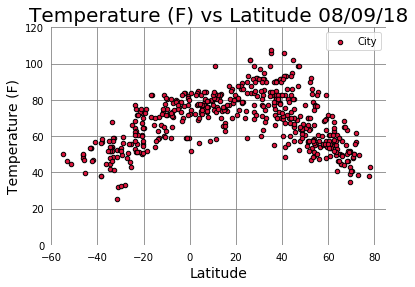

In [15]:

# Scatter Plat #1 Temperature (F) vs. Latitude  

ax = weather_data.plot(kind="scatter", x="Latitude", y="Max Temp", color="crimson", edgecolors="black", label="City")

ax.set_ylim((0, 120))
ax.set_xlim((-60, 85))
ax.set_xlabel("Latitude", fontsize=14)
ax.set_ylabel("Temperature (F)",fontsize=14)
ax.set_title("Temperature (F) vs Latitude 08/09/18",fontsize=20)
ax.set_facecolor("white")
ax.grid(color="grey")
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()



plt.tick_params(bottom=False, left=False)
plt.savefig("Data/Temp_vs_Lat.png")
plt.show()

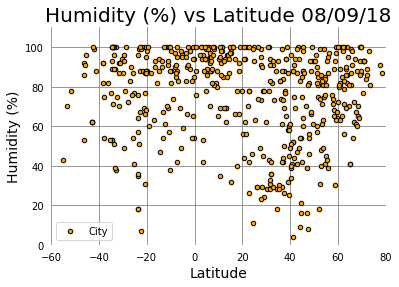

In [13]:

# Scatter plot #2 Humidity vs Latitude
ax = weather_data.plot(kind="scatter", x="Latitude", y="Humidity", color="orange", edgecolor="black", label="City")

ax.set_ylim((0, 110))
ax.set_xlim((-60, 80))
ax.set_xlabel("Latitude", fontsize=14)
ax.set_ylabel("Humidity (%)",fontsize=14)
ax.set_title("Humidity (%) vs Latitude 08/09/18",fontsize=20)
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_facecolor("white")
ax.grid(color="grey")
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()

plt.tick_params(bottom=False, left=False)
plt.savefig("Data/Humidity_vs_Lat.png")
plt.show()

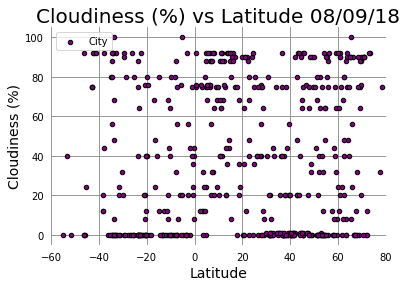

In [10]:
# Scatter Plot #3 Cloudiness (%) vs Latitude
ax = weather_data.plot(kind="scatter", x="Latitude", y="Cloudiness", color="purple", edgecolor="black", label="City")

ax.set_ylim((-5, 105))
ax.set_xlim((-60, 80))
ax.set_xlabel("Latitude", Fontsize=14)
ax.set_ylabel("Cloudiness (%)", Fontsize=14)
ax.set_title("Cloudiness (%) vs Latitude 08/09/18", Fontsize=20)
ax.set_facecolor("white")
ax.grid(color="grey")
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()

plt.tick_params(bottom=False, left=False)
plt.savefig("Data/Cloudiness_vs_Lat.png")
plt.show()

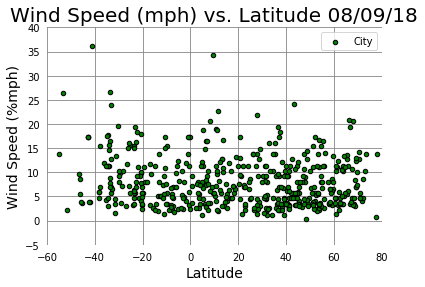

In [11]:

# Plot City Latitude vs Wind Speed# Plot C 
ax = weather_data.plot(kind="scatter", x="Latitude", y="Wind Speed", color="g", edgecolor="black", label="City")

ax.set_ylim((-5, 40))
ax.set_xlim((-60, 80))
ax.set_xlabel("Latitude", Fontsize=14)
ax.set_ylabel("Wind Speed (%mph)", Fontsize=14)
ax.set_title("Wind Speed (mph) vs. Latitude 08/09/18", Fontsize=20)
ax.set_facecolor("white")
ax.grid(color="grey")
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
        
plt.tick_params(bottom=False, left=False)
plt.savefig("Data/Lat_vs_Wind.png")
plt.show()